In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
from IPython.display import Image, display
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


In [2]:
import warnings
warnings.filterwarnings('ignore')

Валидация с 7 метриками

In [3]:
df_search_parameters_Fibroblasts_Induced_Cardiomyocytes = pd.read_csv('df_search_parameters_Fibroblasts_Induced_Cardiomyocytes.csv', index_col =0)

In [16]:
df_search_parameters_Fibroblasts_Induced_Cardiomyocytes['description'].value_counts()

bayes_7_metrics_alpha_00001    80
Name: description, dtype: int64

In [12]:
df_search_parameters_Fibroblasts_Induced_Cardiomyocytes['description'][df_search_parameters_Fibroblasts_Induced_Cardiomyocytes['description'] ==  'bayes_6_metrics_alpha_00001'] = 'bayes_7_metrics_alpha_00001' 

In [14]:
df_search_parameters_Fibroblasts_Induced_Cardiomyocytes.to_csv('df_search_parameters_Fibroblasts_Induced_Cardiomyocytes.csv', columns = df_search_parameters_Fibroblasts_Induced_Cardiomyocytes.columns)

In [51]:
def view_results(df, description, dif_limit, p_limit, depend_on_metric = True):
    df = df[df['description'] == description]
    list_metric = ['logFC', 'betweenness', 'pagerank', 'closeness', 'katz', 'eigenvector', 'eigentrust']
    coeff_dict = {}
    for metric in list_metric:
        coeff_dict['coeff_' + metric] = []
    for i in range(df.shape[0]):
        d = eval(df.iloc[i,3])
        for metric in list_metric:
            coeff_dict['coeff_' + metric].append(d[metric])
    for metric in list_metric: 
        df['coeff_' + metric] = coeff_dict['coeff_' + metric]
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    snsplot1 = sns.distplot(df['average_p_value'])
    plt.subplot(1,2,2)
    snsplot2 = sns.distplot(df['dif_mean'])
    if  depend_on_metric == True:
        plt.figure(figsize=(20,10))
        for (i, metric) in zip(range(1,10), list_metric):
            plt.subplot(3,3,i)
            plt.xlabel(metric)
            plt.ylabel('average_p_value')
            plt.scatter(df['coeff_' + metric], df['average_p_value'])
            plt.axis([0, 11, - p_limit, p_limit])

        plt.figure(figsize=(20,10))
        for (i, metric) in zip(range(1,10), list_metric):
            plt.subplot(3,3,i)
            plt.xlabel(metric)
            plt.ylabel('difference of averagу')
            plt.scatter(df['coeff_' + metric], df['dif_mean'])
            plt.axis([0, 11, -dif_limit, dif_limit])
    return  df

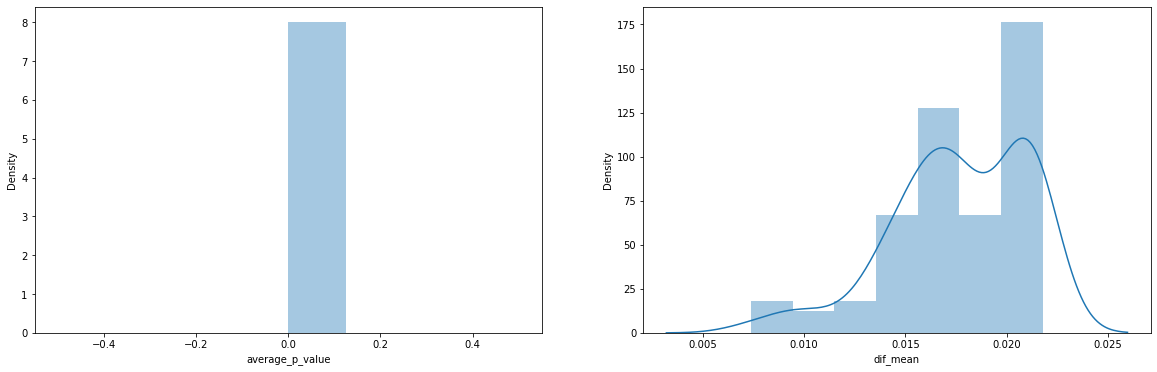

In [52]:
df = view_results(df_search_parameters_Fibroblasts_Induced_Cardiomyocytes, 'bayes_7_metrics_alpha_00001', 0.01, 0.0001, depend_on_metric = False)

In [57]:
df['average_p_value'].unique()

array([0.])

In [18]:
with open("_max_bayes_Fibroblasts_Induced_Cardiomyocytes.json", "r") as read_file:
    max_res = json.load(read_file)

In [21]:
print(max_res)

{'target': 0.021786260254217815, 'params': {'coeff_betweenness': 9.84984928534643, 'coeff_closeness': 4.6485753512889545, 'coeff_eigentrust': 9.49333193254202, 'coeff_eigenvector': 9.55333414353536, 'coeff_katz': 9.734513352116581, 'coeff_logFC': 1.0620680541391545, 'coeff_pagerank': 9.491544528188959}}


In [32]:
id_max = df_search_parameters_Fibroblasts_Induced_Cardiomyocytes[df_search_parameters_Fibroblasts_Induced_Cardiomyocytes['dif_mean'] == max_res['target']]['id_folder']
print(id_max)

Series([], Name: id_folder, dtype: int64)


In [30]:
max_target = df_search_parameters_Fibroblasts_Induced_Cardiomyocytes[df_search_parameters_Fibroblasts_Induced_Cardiomyocytes['description'] \
                                                        == 'bayes_7_metrics_alpha_00001']['dif_mean'].max()

In [40]:
id_max = int(df_search_parameters_Fibroblasts_Induced_Cardiomyocytes\
[df_search_parameters_Fibroblasts_Induced_Cardiomyocytes['dif_mean'] == max_target]['id_folder'])
print(id_max)

93


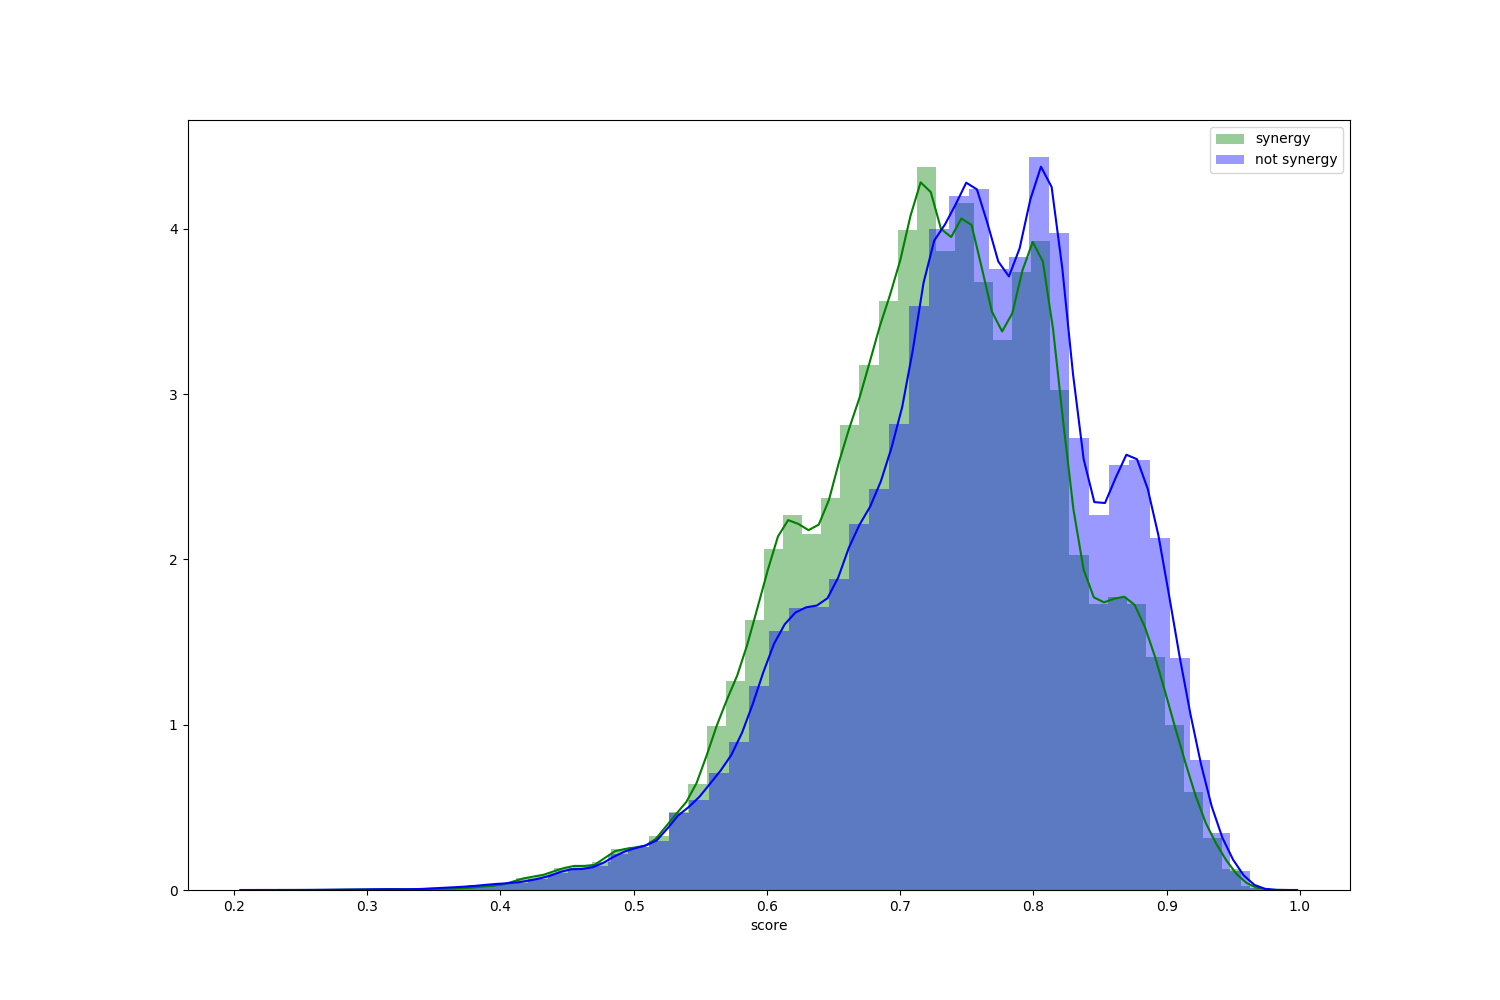

In [41]:
img = Image('Validation_results_Fibroblasts_Induced_Cardiomyocytes/Validation_results_Fibroblasts_Induced_Cardiomyocytes_bayes_6_metrics_alpha_00001/fig_Fibroblasts_Induced_Cardiomyocytes_' + str(id_max) + '.png')
display(img)

In [53]:
df\
[df['dif_mean'] == max_target]

,Unnamed: 0.1,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean,description,coeff_logFC,coeff_betweenness,coeff_pagerank,coeff_closeness,coeff_katz,coeff_eigenvector,coeff_eigentrust
93,93,93,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 1.0620680541391545, 'betweenness': 9...",0.110629,0.0,0.72908,0.750867,0.021786,bayes_7_metrics_alpha_00001,1.062068,9.849849,9.491545,4.648575,9.734513,9.553334,9.493332
